In [1]:
import numpy as np
import sklearn.datasets as datasets
import pandas as pd

iris=datasets.load_iris() # Loading the iris dataset

df_iris=pd.DataFrame(iris.data, columns=iris.feature_names) # Forming the iris dataframe
print(df_iris.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [2]:
df_iris.shape

(150, 4)

In [3]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [4]:
X=iris.data
Y=iris.target
Y=Y.astype(int)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [7]:
### Decision Tree Model

In [8]:
# Prediction using the Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=0)
# fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [9]:
Y_pred=model_DecisionTree.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(2, 2), (1, 1), (0, 0), (2, 2), (0, 0), (2, 2), (0, 0), (1, 1), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (2, 2), (1, 1), (0, 0), (0, 0), (2, 2), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (2, 2), (1, 1), (0, 0), (2, 2), (2, 2), (1, 1), (0, 0), (1, 2), (1, 1), (1, 1), (2, 2), (0, 0), (2, 2), (0, 0), (0, 0)]


In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Confusion Report

print("Confusion Matrix -- ")
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score --")
print(accuracy_score(Y_test,Y_pred))
print("Classification Report --")
print(classification_report(Y_test,Y_pred))

Confusion Matrix -- 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy Score --
0.9777777777777777
Classification Report --
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [11]:
print(list(zip(df_iris.columns,model_DecisionTree.feature_importances_)))

[('sepal length (cm)', 0.0), ('sepal width (cm)', 0.021504642271982528), ('petal length (cm)', 0.3976695134630798), ('petal width (cm)', 0.5808258442649378)]


In [12]:
from sklearn import tree
with open("model_DecisionTree.txt","w") as f:
    f=tree.export_graphviz(model_DecisionTree,feature_names=df_iris.columns[:],out_file=f)

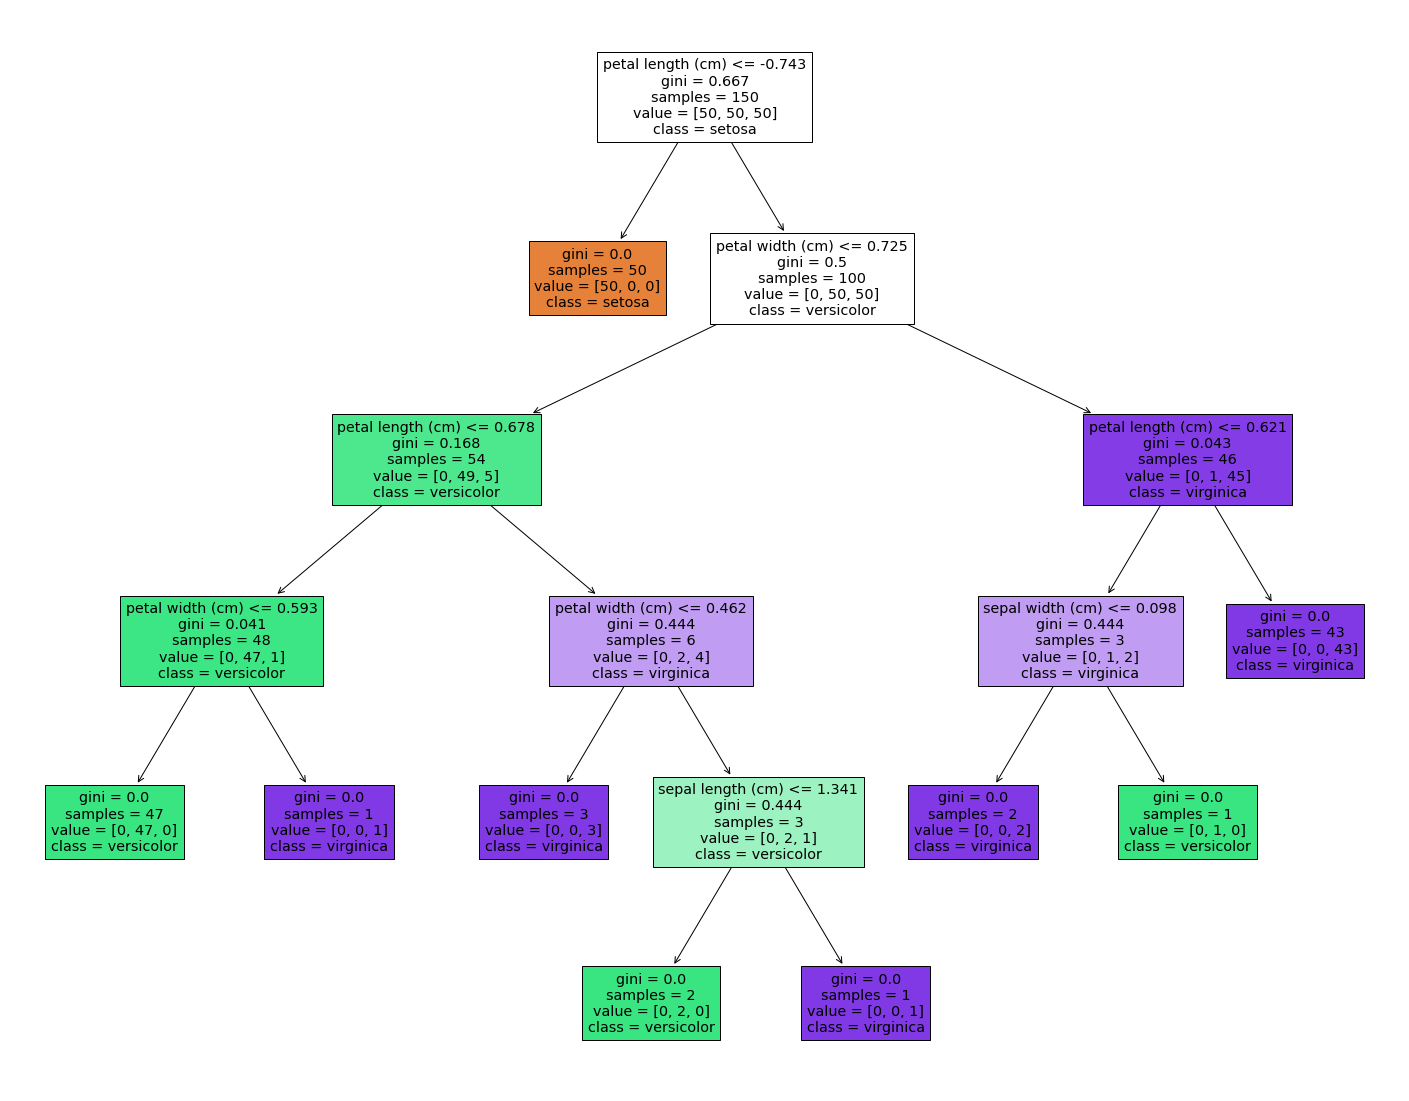

In [13]:
from matplotlib import pyplot as plt

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, Y)

text_representation = tree.export_text(clf)


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

